<a href="https://colab.research.google.com/github/Andrebarbosalima/MachineLearningAcoes/blob/main/MachineLearningAcoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install yfinance

In [2]:
import yfinance as yF


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [34]:
#import numpy as np
import pandas as pd
# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [35]:
# Carrega o dataset
Cotacoes = yF.Ticker("BBAS3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-11 00:00:00-02:00,37.98,38.10,36.67,36.67,9468000,0.00,0.00
2019-02-12 00:00:00-02:00,37.12,39.05,37.10,38.92,18333100,0.00,0.00
2019-02-13 00:00:00-02:00,38.92,39.26,37.72,38.04,14744400,0.00,0.00
2019-02-14 00:00:00-02:00,38.86,40.16,38.04,39.98,27857700,0.00,0.00
2019-02-15 00:00:00-02:00,39.95,40.52,39.64,40.03,12532600,0.00,0.00
2019-02-18 00:00:00-03:00,39.70,40.01,39.10,39.64,8809400,0.00,0.00
2019-02-19 00:00:00-03:00,39.76,40.84,39.67,39.81,13553400,0.00,0.00
2019-02-20 00:00:00-03:00,40.38,40.55,38.68,38.68,16672300,0.00,0.00
2019-02-21 00:00:00-03:00,39.04,39.36,38.64,38.86,10342700,0.00,0.00


In [36]:
# Retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-11 00:00:00-02:00,37.98,38.10,36.67,36.67,9468000,0.00,0.00
1,2019-02-12 00:00:00-02:00,37.12,39.05,37.10,38.92,18333100,0.00,0.00
2,2019-02-13 00:00:00-02:00,38.92,39.26,37.72,38.04,14744400,0.00,0.00
3,2019-02-14 00:00:00-02:00,38.86,40.16,38.04,39.98,27857700,0.00,0.00
4,2019-02-15 00:00:00-02:00,39.95,40.52,39.64,40.03,12532600,0.00,0.00


In [37]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1238,2024-02-05 00:00:00-03:00,57.73,58.34,57.35,58.34,7574400,0.00,0.00
1239,2024-02-06 00:00:00-03:00,58.42,59.73,58.40,59.60,8289000,0.00,0.00
1240,2024-02-07 00:00:00-03:00,59.57,59.80,58.67,59.44,8176500,0.00,0.00
1241,2024-02-08 00:00:00-03:00,59.46,59.73,58.26,58.54,10599600,0.00,0.00
1242,2024-02-09 00:00:00-03:00,58.50,58.58,55.30,57.57,24066000,0.00,0.00


In [39]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1236,2024-02-01 00:00:00-03:00,56.45,57.74,56.30,57.74,11324300,0.00,0.00
1237,2024-02-02 00:00:00-03:00,57.70,57.87,57.14,57.72,7484500,0.00,0.00
1238,2024-02-05 00:00:00-03:00,57.73,58.34,57.35,58.34,7574400,0.00,0.00
1239,2024-02-06 00:00:00-03:00,58.42,59.73,58.40,59.60,8289000,0.00,0.00
1240,2024-02-07 00:00:00-03:00,59.57,59.80,58.67,59.44,8176500,0.00,0.00


In [40]:
# Vamos excluir as colunas que não serão utilizadas e renomear os campos
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2019-02-11 00:00:00-02:00,37.98,38.10,36.67,36.67,9468000
1,2019-02-12 00:00:00-02:00,37.12,39.05,37.10,38.92,18333100
2,2019-02-13 00:00:00-02:00,38.92,39.26,37.72,38.04,14744400
3,2019-02-14 00:00:00-02:00,38.86,40.16,38.04,39.98,27857700
4,2019-02-15 00:00:00-02:00,39.95,40.52,39.64,40.03,12532600


In [41]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2019-02-11 00:00:00-02:00
Maior data: 2024-02-07 00:00:00-03:00


In [42]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])

Data          2024-02-07 00:00:00-03:00
Abertura                          59.57
Maximo                            59.80
Minimo                            58.67
Fechamento                        59.44
Volume                          8176500
Name: 1240, dtype: object

In [43]:
# Tipos de Dados
dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [44]:
# Volume de dados
dados.shape

(1241, 6)

In [45]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1241.00,1241.00,1241.00,1241.00,1241.00
mean,33.76,34.21,33.29,33.73,14772587.11
std,8.38,8.39,8.37,8.41,8336823.09
min,18.88,19.50,17.09,17.26,0.00
25%,26.62,27.02,26.18,26.61,9273900.00
50%,32.44,32.84,32.01,32.42,12673500.00
75%,38.17,38.71,37.58,38.13,17870500.00
max,59.57,59.80,58.67,59.60,102036100.00


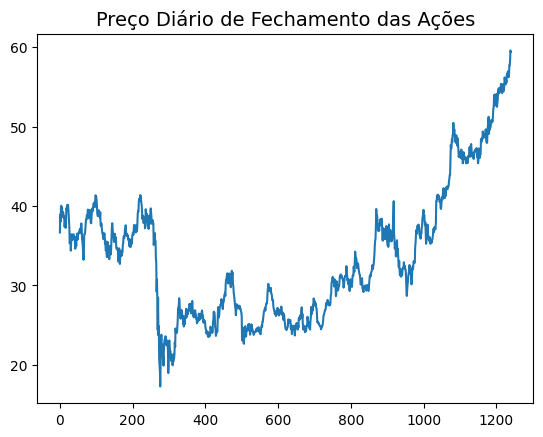

In [46]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [47]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2019-02-11 00:00:00-02:00,37.98,38.10,36.67,36.67,9468000
1,2019-02-12 00:00:00-02:00,37.12,39.05,37.10,38.92,18333100
2,2019-02-13 00:00:00-02:00,38.92,39.26,37.72,38.04,14744400
3,2019-02-14 00:00:00-02:00,38.86,40.16,38.04,39.98,27857700
4,2019-02-15 00:00:00-02:00,39.95,40.52,39.64,40.03,12532600


In [48]:
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [49]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2019-02-11 00:00:00-02:00,37.98,38.10,36.67,36.67,9468000,NaN,NaN,NaN
1,2019-02-12 00:00:00-02:00,37.12,39.05,37.10,38.92,18333100,NaN,NaN,NaN
2,2019-02-13 00:00:00-02:00,38.92,39.26,37.72,38.04,14744400,NaN,NaN,NaN
3,2019-02-14 00:00:00-02:00,38.86,40.16,38.04,39.98,27857700,NaN,NaN,NaN
4,2019-02-15 00:00:00-02:00,39.95,40.52,39.64,40.03,12532600,38.73,NaN,NaN
5,2019-02-18 00:00:00-03:00,39.70,40.01,39.10,39.64,8809400,39.32,NaN,NaN
6,2019-02-19 00:00:00-03:00,39.76,40.84,39.67,39.81,13553400,39.50,NaN,NaN
7,2019-02-20 00:00:00-03:00,40.38,40.55,38.68,38.68,16672300,39.63,NaN,NaN
8,2019-02-21 00:00:00-03:00,39.04,39.36,38.64,38.86,10342700,39.40,NaN,NaN
9,2019-02-22 00:00:00-03:00,39.29,39.52,38.84,39.21,7260200,39.24,NaN,NaN


In [50]:
dados.dropna(inplace=True)

In [51]:
dados.shape

(1221, 9)

In [22]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:822 linhas teste = 0:822:1202 linhas validacao = 0:1202:1222'

In [52]:
# Separando variaveis PREDITORAS e variavel ALVO
preditoras = dados.drop(['Data', 'Fechamento','Volume'], 1)
target = dados['Fechamento']

In [53]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,39.41,40.42,39.19,39.03,38.59,38.73
21,40.00,40.08,39.19,39.55,38.67,38.88
22,39.78,40.22,39.62,39.87,38.76,38.94
23,40.42,40.45,39.78,39.89,38.81,39.03
24,40.00,40.04,38.91,39.79,38.84,38.98


In [54]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1236,56.45,57.74,56.30,56.78,56.33,55.80
1237,57.70,57.87,57.14,56.93,56.43,55.97
1238,57.73,58.34,57.35,57.30,56.61,56.14
1239,58.42,59.73,58.40,57.97,56.87,56.34
1240,59.57,59.80,58.67,58.57,57.16,56.57


In [56]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [57]:
# Verificando a normalização realizada
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (1221, 6)
[[0.50455988 0.51900739 0.53159746 0.50035525 0.48675526 0.49485397]
 [0.5191221  0.51055178 0.53141909 0.5134912  0.48899446 0.49910132]
 [0.51366115 0.51404419 0.54193    0.52168224 0.49156032 0.5007651 ]
 ...
 [0.95478468 0.9637719  0.96825425 0.96746364 0.98477898 0.98763596]
 [0.97174039 0.99826304 0.99350663 0.98470382 0.99190581 0.9933663 ]
 [1.         1.         1.         1.         1.         1.        ]]


In [58]:
# Separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

822 822
380 380


In [59]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.88'

In [62]:
# Treinamento usando regressão linear
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.44'

In [63]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2024-01-12 00:00:00-03:00,55.12,54.82
2024-01-15 00:00:00-03:00,56.20,55.97
2024-01-16 00:00:00-03:00,55.88,56.25
2024-01-17 00:00:00-03:00,55.99,55.97
2024-01-18 00:00:00-03:00,55.34,55.56
2024-01-19 00:00:00-03:00,55.92,56.12
2024-01-22 00:00:00-03:00,55.55,55.64
2024-01-23 00:00:00-03:00,56.54,56.33
2024-01-24 00:00:00-03:00,56.65,56.82


In [64]:
df.tail()

,Real,Previsão
Data_Pregão,,
2024-02-01 00:00:00-03:00,57.74,57.49
2024-02-02 00:00:00-03:00,57.72,57.44
2024-02-05 00:00:00-03:00,58.34,57.99
2024-02-06 00:00:00-03:00,59.60,59.54
2024-02-07 00:00:00-03:00,59.44,59.12


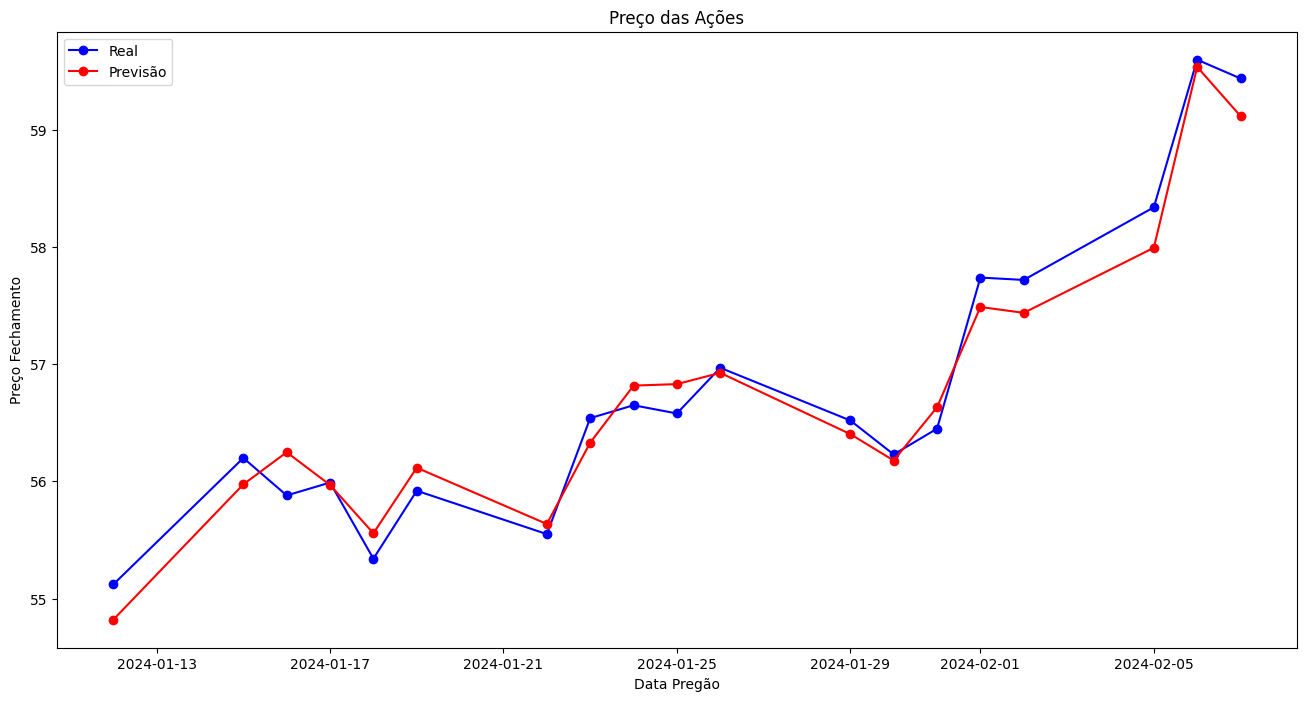

In [65]:
# Gerando o Gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()